# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [5]:
# import dependent library 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
#load boston housing data available in scipy into a dataframe bos
boston = load_boston()

bos = pd.DataFrame(boston.data,columns=boston.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DA88A58C50>,
      dtype=object)

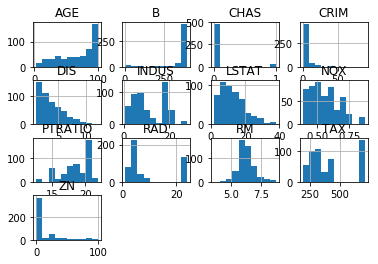

In [6]:
# show histogram of all
bos.hist()

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

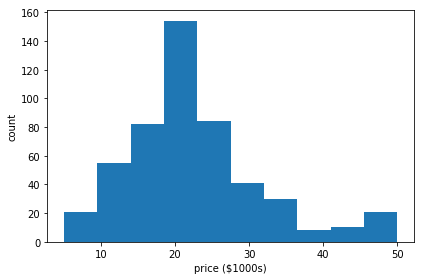

In [8]:
# show diagram with rpt to target
plt.figure(figsize=(6, 4))
plt.hist(boston.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [9]:
# include tagert
bos['Price'] =boston.target

In [10]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
import seaborn as sns

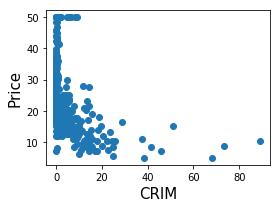

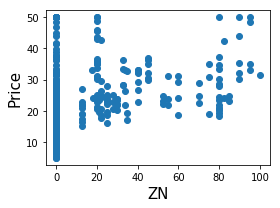

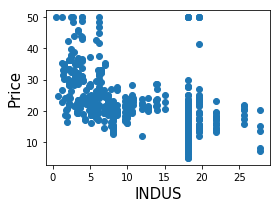

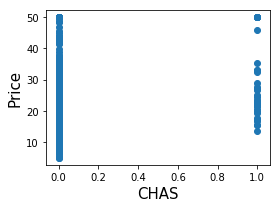

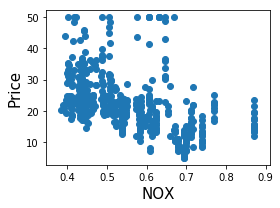

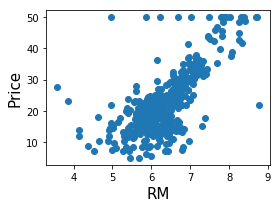

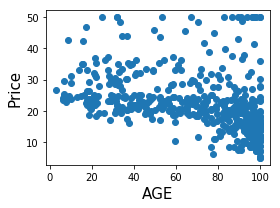

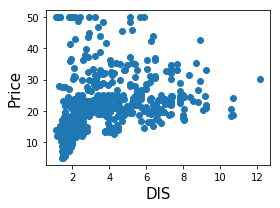

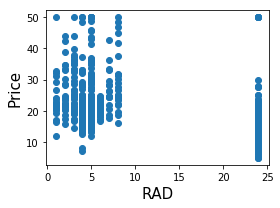

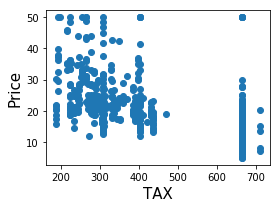

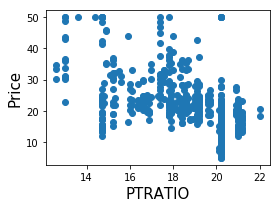

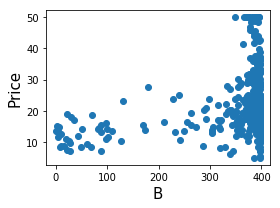

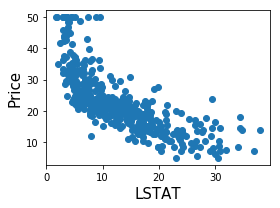

In [12]:
# show graph vs price
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

# Split train-test dataset

Split the dataset into two: target value and predictor values.

Let’s call the target value Y and predictor values X.

Thus,

Y = Boston Housing Price X = All other features

In [13]:
X =bos.drop('Price',axis=1)
Y =bos.Price


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size =0.3,random_state =4)

In [15]:
from sklearn.linear_model import LinearRegression
lm_cf = LinearRegression(normalize=False)

In [16]:
result = lm_cf.fit(X_train,y_train)
y_pred =lm_cf.predict(X_test)

In [17]:
y_pred

array([11.07380893, 26.47910329, 17.34489869, 19.1948608 , 36.36170735,
       24.77095832, 31.00051311, 19.94226881, 19.22375105, 24.42998435,
       28.31512637, 28.40796034, 19.27427968, 33.82295207, 21.28596487,
       15.11171444, 20.97688767, 11.28556596, 11.8611348 , 13.88444387,
        5.37422679, 17.55278177, 20.58171204, 22.59849951, 16.07544265,
       20.45924503, 19.1068775 , 14.37832191, 21.23235601, 17.52186564,
       14.40725559, 23.68483414, 33.7410661 , 22.02733357, 17.62139147,
       19.97241153, 30.24069397, 34.69718954, 23.85821534, 24.30715093,
       36.13378112, 31.97532293, 19.626175  , 31.61097971, 34.58127809,
       25.62718797, 39.95041812, 17.60880538, 19.90319708, 23.40417501,
       33.70182396, 25.62491083, 18.25559302, 27.27317174, 13.46377871,
       23.43470656, 24.43721849, 33.52056736, 16.99896935, 37.94464404,
       15.94567818, 19.32528916, 31.84088262, 15.25081303, 38.40344789,
       27.45372884, 34.36154312,  9.37353936, 19.42580066, 21.99

In [18]:
lm_cf.coef_

array([-1.22569795e-01,  5.56776996e-02, -8.83428230e-03,  4.69344849e+00,
       -1.44357828e+01,  3.28008033e+00, -3.44778157e-03, -1.55214419e+00,
        3.26249618e-01, -1.40665500e-02, -8.03274915e-01,  9.35368715e-03,
       -5.23477529e-01])

In [19]:
lm_cf.intercept_

36.357041376595205

In [20]:
lm_cf.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

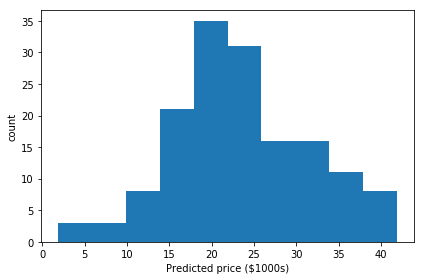

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(y_pred)
plt.xlabel('Predicted price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [22]:
# print coefficients (Slope) beta1
print(boston.feature_names,"\n", lm_cf.coef_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 
 [-1.22569795e-01  5.56776996e-02 -8.83428230e-03  4.69344849e+00
 -1.44357828e+01  3.28008033e+00 -3.44778157e-03 -1.55214419e+00
  3.26249618e-01 -1.40665500e-02 -8.03274915e-01  9.35368715e-03
 -5.23477529e-01]


# How do we interpret the coefficients?

Holding all other variables fixed, considering an area where there is more crime rate (CRIM) the predicted price of the house decrease by 12256.88 $.

Being an urban area with good pupil-teacher ratio by town is associated with an average increase in price of houses by 93568.51 $

Text(0.5,1,'Prices vs Predicted prices')

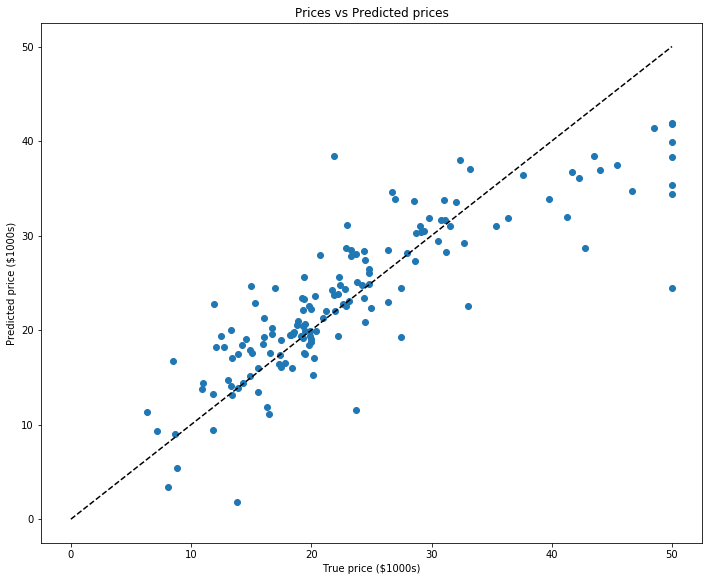

In [23]:
#import seaborn as sns
# sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

# Error Rate of the Model - Root Mean square error

In [24]:
from sklearn.metrics import mean_squared_error
print("Error Rate of the Regression Model : ",mean_squared_error(y_pred,y_test))

Error Rate of the Regression Model :  30.068160533746692


In [25]:
from sklearn.linear_model import SGDRegressor

In [67]:
model = SGDRegressor( max_iter=100000, tol=1e-3)

In [68]:
result = model.fit(X_train,y_train)

In [69]:
y_pred = model.predict(X_test)

In [70]:
model.coef_


array([ 8.69235454e+11,  4.22624842e+11,  2.35760906e+11,  5.68332672e+09,
        2.55943783e+09,  2.26790202e+11, -1.71176418e+11,  1.72349057e+10,
       -1.88139028e+11, -1.83705770e+11,  5.71994333e+10, -1.63710505e+11,
        3.26998846e+11])

In [71]:
model.intercept_


array([1.56018875e+10])

In [72]:
# print coefficients (Slope) beta1
print(boston.feature_names,"\n", model.coef_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 
 [ 8.69235454e+11  4.22624842e+11  2.35760906e+11  5.68332672e+09
  2.55943783e+09  2.26790202e+11 -1.71176418e+11  1.72349057e+10
 -1.88139028e+11 -1.83705770e+11  5.71994333e+10 -1.63710505e+11
  3.26998846e+11]


In [73]:
model.loss_functions

{'squared_loss': (sklearn.linear_model.sgd_fast.SquaredLoss,),
 'huber': (sklearn.linear_model.sgd_fast.Huber, 0.1),
 'epsilon_insensitive': (sklearn.linear_model.sgd_fast.EpsilonInsensitive,
  0.1),
 'squared_epsilon_insensitive': (sklearn.linear_model.sgd_fast.SquaredEpsilonInsensitive,
  0.1)}

In [76]:
model.fit_intercept

True